In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
np.random.seed(192)

In [4]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

N = 500

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X0.shape

(500, 2)

In [7]:
X = np.row_stack((X0, X1, X2))
X.shape

(1500, 2)

In [8]:
K = 3

In [13]:
truth_labels = np.array([0] * N + [1] * N + [2] * N)
truth_labels.shape

(1500,)

In [53]:
def kmeans_display(X, label):
    x0 = X[label==0, :]
    x1 = X[label==1, :]
    x2 = X[label==2, :]

    plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(x1[:, 0], x1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(x2[:, 0], x2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

def kmeans_init_centers(X, num_rows):
    return X[np.random.choice(X.shape[0], num_rows, replace=False)]


def kmeans_assign_labels(X, centers):
    dists = cdist(X, centers)
    print(dists)
    return np.argmin(dists, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]

        centers[k, :] = np.mean(Xk)

    return centers


def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K, max_iter=1000):
    centers = [kmeans_init_centers(X, K)]
    labels = []

    i = 0
    while (True):
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if (has_converged(centers[-1], new_centers) or i > max_iter):
            if (i > max_iter):
                print("Didnt converged")
            break

        centers.append(new_centers)
        i += 1

    return (centers, labels, i)

In [54]:
centers, labels, i = kmeans(X, K)

[[1.17993059 1.33835185 3.50414969]
 [1.4070215  0.42069145 3.90866152]
 [0.68207242 1.808513   4.66674089]
 ...
 [4.41532503 3.37913903 0.87120632]
 [4.31523075 3.70996362 1.06558903]
 [4.90238978 3.78616451 1.47093015]]
[[1.47766901 3.75572957 3.89775011]
 [1.4837681  2.81951261 2.96950948]
 [0.81263951 4.62541962 4.77425305]
 ...
 [4.66086739 1.93187815 1.93904023]
 [4.60834532 3.60927806 3.66073407]
 [5.12840931 1.72780034 1.68062654]]
[[1.29862716 3.01006775 5.01602256]
 [0.95774779 2.01862113 4.13417169]
 [1.13442147 3.83135731 5.9312984 ]
 ...
 [4.17282219 2.08730322 2.3488583 ]
 [4.26295906 3.43476542 4.22411078]
 [4.61633288 2.1491898  1.76648833]]
[[1.30314977 3.10165783 5.10971612]
 [0.98564902 2.11854465 4.2307974 ]
 [1.11269059 3.9303935  6.02739391]
 ...
 [4.1987997  2.05119676 2.40528018]
 [4.2805407  3.4467509  4.28180599]
 [4.64377144 2.08407601 1.80765386]]
[[1.30158496 3.18238113 5.16819329]
 [0.97642507 2.20618167 4.29104905]
 [1.11982964 4.01725429 6.08732185]
 ...

Centers: [[1.83748828 1.83748828]
 [4.1369607  4.1369607 ]
 [5.5900583  5.5900583 ]]
labels: [0 1 2]


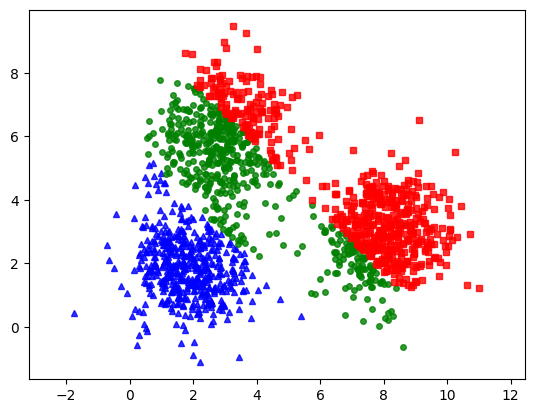

In [57]:
print(f"Centers: {centers[-1]}")
print(f"labels: {np.unique(labels[-1])}")
kmeans_display(X, labels[-1])

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centers found by scikit-learn:
[[7.96395235 2.89184919]
 [2.89847844 5.98316675]
 [1.90958619 1.90502803]]


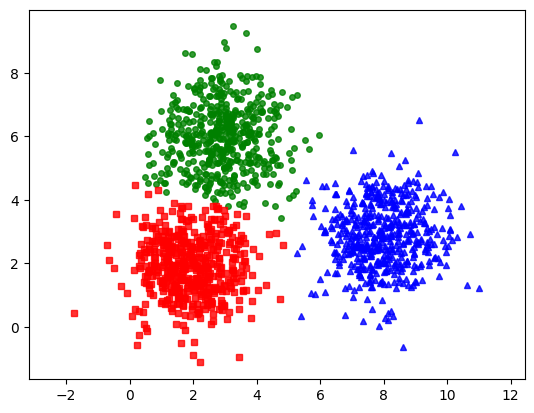

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)